# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('Summary of Weather.csv')


# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Check info on the dataset
df.info()
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

C:\ProgramData\Temp\ipykernel_4036\1273162281.py:4: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Summary of Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Print unique values for columns containing NaN
for column in df.columns:
    if df[column].isnull().any():
        unique_values = df[column].unique()
        print(f"Column: {column}, Unique Values: {unique_values}")

Column: WindGustSpd, Unique Values: [   nan 29.632 59.264 50.004 40.744 51.856 44.448 57.412 53.708 42.596
 62.968 68.524 61.116 46.3   38.892 55.56  31.484 37.04  74.08  64.82
 48.152 35.188 27.78  33.336 20.372 22.224 24.076 25.928 75.932 66.672
 18.52 ]
Column: Snowfall, Unique Values: [0.0 nan '0' '22.86' '33.02' '30.48' '2.54' '5.08' '10.16' '7.62' '20.32'
 '15.24' '17.78' '12.7' '25.4' '27.94' '43.18' '38.1' '45.72' '53.34'
 '58.42' '66.04' '76.2' '81.28' '73.66' '63.5' '50.8' '48.26' '60.96'
 '55.88' '35.56' '78.74' '40.64' '86.36' '83.82' '68.58' '#VALUE!' 10.16
 7.62 15.24 2.54 5.08 12.7]
Column: PoorWeather, Unique Values: [nan '1' '1     1' '1 1' '1     1  1' '1  1' '1        1' '0' '1   1 1'
 '1    1' '1     0' '1000' '1001' '100000' '1000001000' '101000' '101001'
 '1000001001' '1000101001' '100001' '1000000000' '1000101000' '1010001000'
 '1000100000' '1000100001' '1010001001' '10001001' '11' '11 1' '11    1'
 '1100000' '1 1  1' '1 0  1' '1 0' '1   1 1  1' '1000000' '110100

## 2. Clean the dataset, drop variables

First, drop columns with only null

In [4]:
# Drop columns with all NaN
df = df.dropna(axis=1, how='all')

# Drop SND column since it contains only NaN or 0.
df = df.drop(columns=['SND'])

# Drop columns with few non-null values
columns_to_drop = ['WindGustSpd', 'DR', 'SPD', 'PGT']
df = df.drop(columns=columns_to_drop)

In [5]:
# See info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   MaxTemp      119040 non-null  float64
 4   MinTemp      119040 non-null  float64
 5   MeanTemp     119040 non-null  float64
 6   Snowfall     117877 non-null  object 
 7   PoorWeather  34237 non-null   object 
 8   YR           119040 non-null  int64  
 9   MO           119040 non-null  int64  
 10  DA           119040 non-null  int64  
 11  PRCP         117108 non-null  object 
 12  MAX          118566 non-null  float64
 13  MIN          118572 non-null  float64
 14  MEA          118542 non-null  float64
 15  SNF          117877 non-null  object 
 16  TSHDSBRSGF   34237 non-null   object 
dtypes: float64(6), int64(4), object(7)
memory usage: 15.4+ MB


PoorWeather and TSHDSBRSGF seems to be redundant by looking at their unique values, to see if they are identical

In [6]:
# Check if PoorWeather and TSHDSBRSGF are identical
if df['PoorWeather'].equals(df['TSHDSBRSGF']):
    print("PoorWeather = TSHDSBRSGF")

PoorWeather = TSHDSBRSGF


In [7]:
# Drop TSHDSBRSGF column, convert PoorWeather NaN to 0 and convert non-zero to 1 for simplicity
df = df.drop(columns=['TSHDSBRSGF'])

df['PoorWeather'] = df['PoorWeather'].fillna(0)
df['PoorWeather'] = df['PoorWeather'].apply(lambda x: 1 if x != 0 else 0)

In [8]:
# See info after modifications
df.info()

# See unique values for columns not int or float
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   MaxTemp      119040 non-null  float64
 4   MinTemp      119040 non-null  float64
 5   MeanTemp     119040 non-null  float64
 6   Snowfall     117877 non-null  object 
 7   PoorWeather  119040 non-null  int64  
 8   YR           119040 non-null  int64  
 9   MO           119040 non-null  int64  
 10  DA           119040 non-null  int64  
 11  PRCP         117108 non-null  object 
 12  MAX          118566 non-null  float64
 13  MIN          118572 non-null  float64
 14  MEA          118542 non-null  float64
 15  SNF          117877 non-null  object 
dtypes: float64(6), int64(5), object(5)
memory usage: 14.5+ MB
Column: Date, Unique Values: ['1942-7-1' '1942-7-2' 

In [9]:
# Convert date from string to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Set 'T' to 0, since 'T' means trace amount
df['Precip'] = df['Precip'].replace('T', 0).astype(float)
df['PRCP'] = df['PRCP'].replace('T', 0).astype(float)
df['SNF'] = df['SNF'].replace('T', 0).astype(float)

# Set '#VALUE!' and NaN to 0 in Snowfall column
df['Snowfall'] = df['Snowfall'].replace('#VALUE!', 0)
df['Snowfall'] = df['Snowfall'].fillna(0)


# Set NaN in PRCP, MAX, Min, MEA, SNF to 0
df['PRCP'] = df['PRCP'].fillna(0)
df['MAX'] = df['MAX'].fillna(0)
df['MIN'] = df['MIN'].fillna(0)
df['MEA'] = df['MEA'].fillna(0)
df['SNF'] = df['SNF'].fillna(0)

In [10]:
# See info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STA          119040 non-null  int64         
 1   Date         119040 non-null  datetime64[ns]
 2   Precip       119040 non-null  float64       
 3   MaxTemp      119040 non-null  float64       
 4   MinTemp      119040 non-null  float64       
 5   MeanTemp     119040 non-null  float64       
 6   Snowfall     119040 non-null  object        
 7   PoorWeather  119040 non-null  int64         
 8   YR           119040 non-null  int64         
 9   MO           119040 non-null  int64         
 10  DA           119040 non-null  int64         
 11  PRCP         119040 non-null  float64       
 12  MAX          119040 non-null  float64       
 13  MIN          119040 non-null  float64       
 14  MEA          119040 non-null  float64       
 15  SNF          119040 non-null  floa

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# See correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [12]:
# See unique valeus for some columms
see_unique_columns = ['YR', 'MO', 'DA', 'STA', 'Snowfall']
for column in see_unique_columns:
    unique_values = df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: YR, Unique Values: [42 43 44 45 41 40]
Column: MO, Unique Values: [ 7  8  9 10 11 12  1  2  3  4  5  6]
Column: DA, Unique Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Column: STA, Unique Values: [10001 10002 10101 10102 10502 10505 10701 10703 10704 10705 10718 10802
 10803 10804 10806 10807 11101 11103 11501 11601 11604 11606 11610 11615
 11701 11704 11801 11901 11902 12001 12101 12701 12702 12706 12801 13002
 13005 13007 13013 13201 13601 15027 16101 16201 16202 16405 16407 16504
 20501 20602 21501 22502 22504 22507 22508 22509 30001 31001 31101 31302
 31401 31501 31701 32301 32501 32503 32504 32601 32602 32603 32701 32702
 32801 32803 32805 32812 32815 32904 32906 32907 33003 33013 33014 33019
 33023 33031 33044 33109 33111 33117 33121 33123 33205 33206 33303 33305
 33307 33401 33405 33406 33501 34002 34003 34005 34012 34013 34017 34018
 34022 34101 34104 34105 34109 34111 34113 34123 34139 34147 34150 40601
 41204 

In [13]:
# Select relevant features
selected_features = ['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall']
df_selected = df[selected_features]

print(df_selected.head())

     STA       Date  Precip    MaxTemp    MinTemp   MeanTemp Snowfall
0  10001 1942-07-01   1.016  25.555556  22.222222  23.888889      0.0
1  10001 1942-07-02   0.000  28.888889  21.666667  25.555556      0.0
2  10001 1942-07-03   2.540  26.111111  22.222222  24.444444      0.0
3  10001 1942-07-04   2.540  26.666667  22.222222  24.444444      0.0
4  10001 1942-07-05   0.000  26.666667  21.666667  24.444444      0.0


In [14]:
df_selected.info()

# Cast Snowfall as float
df_selected['Snowfall'] = df_selected['Snowfall'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  119040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 6.4+ MB


C:\ProgramData\Temp\ipykernel_4036\1553149566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Snowfall'] = df_selected['Snowfall'].astype(float)


In [15]:
# Plot the min_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Date', y='MinTemp', hue='STA')
plt.title('Minimum Temperature Over Time by Station')

# plot max_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Date', y='MaxTemp', hue='STA')
plt.title('Maximum Temperature Over Time by Station')

# plot mean_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Date', y='MeanTemp', hue='STA')
plt.title('Mean Temperature Over Time by Station')

# Plot Snowfall for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Date', y='Snowfall', hue='STA')
plt.title('Snowfall Over Time by Station')

NameError: name 'plt' is not defined

From this, we see that stations are opened at different dates. There seems to be an error in one station, where temperature remained constant throughout. Additionally, some stations have discontinuities in their measurements, resulting in straight line from one temperature to another.

Since we wish to use a rolling window to predict future values, we must remove stations with discontinuities.

Also, for many stations, the mean temp suddenly drops to a low and consistent number. This could happen due to error in max or min temp. Detect these cases and replace with neighbouring temps.

In [16]:
# See if dates are uniformly spaced
date_diffs = df_selected.groupby('STA')['Date'].diff().dt.days

# get index of rows where date_diffs is more to 1, ignoring NaN for beginning and end of each station.
non_uniform_dates = date_diffs[date_diffs > 1].index

# See how many discontinuities there are
print(len(non_uniform_dates))

# Iterate through all index for discontinuities
for idx in non_uniform_dates:
    # Get the station based on the index
    station = df_selected.loc[idx, 'STA']

    # Print the discontinuity rows
    print(df_selected.iloc[idx-1]['Date'])
    print(df_selected.iloc[idx]['Date'])
    print('-------------')



249
1944-02-01 00:00:00
1944-02-03 00:00:00
-------------
1944-09-29 00:00:00
1944-10-01 00:00:00
-------------
1943-03-31 00:00:00
1943-06-01 00:00:00
-------------
1943-09-28 00:00:00
1943-10-01 00:00:00
-------------
1942-09-01 00:00:00
1942-09-04 00:00:00
-------------
1942-09-16 00:00:00
1942-09-18 00:00:00
-------------
1942-11-12 00:00:00
1942-11-15 00:00:00
-------------
1942-12-24 00:00:00
1942-12-27 00:00:00
-------------
1945-08-23 00:00:00
1945-08-25 00:00:00
-------------
1941-10-09 00:00:00
1941-10-18 00:00:00
-------------
1941-10-19 00:00:00
1941-10-22 00:00:00
-------------
1941-10-22 00:00:00
1941-10-24 00:00:00
-------------
1941-10-25 00:00:00
1941-10-30 00:00:00
-------------
1941-10-30 00:00:00
1941-11-03 00:00:00
-------------
1941-11-06 00:00:00
1941-11-08 00:00:00
-------------
1941-11-08 00:00:00
1941-11-12 00:00:00
-------------
1941-11-12 00:00:00
1941-11-15 00:00:00
-------------
1941-11-15 00:00:00
1941-11-19 00:00:00
-------------
1941-11-19 00:00:00
1941

In [17]:
# For dates with one day missing, fill missing date with average of the previous and next date's temperature
df_imputed = []

numeric_columns = ['Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall']

# Build new df by checking if discontinuity, use mean
for i in range(len(df_selected)):
    df_imputed.append(df_selected.iloc[i])

    # Append mean if it is in discontinuity
    if i+1 in non_uniform_dates:
        mean_row = df_selected.iloc[i].copy()
        mean_row['Date'] = df_selected.iloc[i]['Date'] + pd.Timedelta(days=1)
        mean_row['STA'] = df_selected.iloc[i]['STA']
        if mean_row['Date'] == df_selected.iloc[i+1]['Date'] - pd.Timedelta(days=1):
            for col in numeric_columns:
                mean_row[col] = (df_selected.iloc[i][col] + df_selected.iloc[i+1][col]) / 2

            df_imputed.append(mean_row)

df_imputed = pd.DataFrame(df_imputed).reset_index(drop=True)



In [18]:
# check discontinuity for after imputing

date_diffs = df_imputed.groupby('STA')['Date'].diff().dt.days

# get index of rows where date_diffs is more to 1, ignoring NaN for beginning and end of each station.
non_uniform_dates_new = date_diffs[date_diffs > 1].index

# See how many discontinuities there are
print(len(non_uniform_dates_new))

# Iterate through all index for discontinuities
for idx in non_uniform_dates_new:
    # Get the station based on the index
    station = df_imputed.loc[idx, 'STA']

    # Print the discontinuity rows
    print(df_imputed.iloc[idx-1]['Date'])
    print(df_imputed.iloc[idx]['Date'])
    print('-------------')

113
1943-03-31 00:00:00
1943-06-01 00:00:00
-------------
1943-09-28 00:00:00
1943-10-01 00:00:00
-------------
1942-09-01 00:00:00
1942-09-04 00:00:00
-------------
1942-11-12 00:00:00
1942-11-15 00:00:00
-------------
1942-12-24 00:00:00
1942-12-27 00:00:00
-------------
1941-10-09 00:00:00
1941-10-18 00:00:00
-------------
1941-10-19 00:00:00
1941-10-22 00:00:00
-------------
1941-10-25 00:00:00
1941-10-30 00:00:00
-------------
1941-10-30 00:00:00
1941-11-03 00:00:00
-------------
1941-11-08 00:00:00
1941-11-12 00:00:00
-------------
1941-11-12 00:00:00
1941-11-15 00:00:00
-------------
1941-11-15 00:00:00
1941-11-19 00:00:00
-------------
1941-11-19 00:00:00
1941-11-28 00:00:00
-------------
1941-11-28 00:00:00
1941-12-02 00:00:00
-------------
1941-12-04 00:00:00
1941-12-07 00:00:00
-------------
1941-12-08 00:00:00
1941-12-20 00:00:00
-------------
1942-01-28 00:00:00
1942-01-31 00:00:00
-------------
1942-02-03 00:00:00
1942-02-06 00:00:00
-------------
1942-02-07 00:00:00
1942

In [19]:
# Delete stations still discontinuous after imputing
delete_station = []
for idx in non_uniform_dates_new:
    if df_imputed.iloc[idx]['STA'] not in delete_station:
        delete_station.append(df_imputed.iloc[idx]['STA'])

# Filter out delte_station
df_deleted = df_imputed.copy()
df_deleted = df_deleted[~df_deleted['STA'].isin(delete_station)].reset_index(drop=True)


print(df_deleted['STA'].unique())

print(len(df_deleted))

[10001 10002 10101 10102 10505 10703 10704 10718 10802 10804 10807 11101
 11103 11501 11601 11606 11610 11615 11701 11704 11801 11901 11902 12001
 12101 12702 12706 12801 13002 13005 13013 13201 15027 16201 16202 16407
 16504 20602 22502 22507 22508 30001 31001 31101 31302 31401 31501 31701
 32301 32504 32601 32602 32603 32701 32702 32805 32815 32906 32907 33014
 33019 33023 33109 33111 33121 33205 33303 33305 33307 33401 33405 33406
 33501 34003 34013 34017 34101 34105 34109 34113 41204 41207 42204 42206
 42401 43201 43302 43305 43307 44401 50302 50303 50304 50401 50403 50801
 50802 60701 61501 61502 62701 80425 80504 80509 80510 81601 81702 82501
 82502 82503]
81831


In [20]:
# Plot the min_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='MinTemp', hue='STA')
plt.title('Minimum Temperature Over Time by Station')

# plot max_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='MaxTemp', hue='STA')
plt.title('Maximum Temperature Over Time by Station')

# plot mean_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='MeanTemp', hue='STA')
plt.title('Mean Temperature Over Time by Station')

# Plot Snowfall for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='Snowfall', hue='STA')
plt.title('Snowfall Over Time by Station')

NameError: name 'plt' is not defined

Now we deal with the cases where temperature is abnormally low. Check if drop in temperature is more than 20 degrees, impute values if true.

In [ ]:
# Find change in temp
temp_diff = df_deleted['MeanTemp'].diff()

# Account for change in temp between station
station_change_rows = 0
for station in df_deleted['STA'].unique():
    station_change_rows += len(df_deleted[df_deleted['STA'] == station])
    temp_diff[station_change_rows] = 1000

abnormal_temp = temp_diff[temp_diff < -20].index

print(abnormal_temp)

station_change = temp_diff[temp_diff == 1000].index

print(df_deleted.iloc[station_change[0]-1])

Index([12511, 13712, 19586, 21199, 21240, 21271, 22408, 22539, 25405, 25406,
       25838, 25965, 25984, 35824, 36780, 59577, 60551, 64676, 64753, 65397,
       77652, 81071],
      dtype='int64')
STA                       10001
Date        1945-08-31 00:00:00
Precip                      0.0
MaxTemp               28.333333
MinTemp               22.222222
MeanTemp              25.555556
Snowfall                    0.0
Name: 1157, dtype: object


In [ ]:
print(df_deleted.iloc[12511])

STA                       11601
Date        1942-09-17 00:00:00
Precip                    0.508
MaxTemp              -17.777778
MinTemp              -17.777778
MeanTemp             -17.777778
Snowfall                    0.0
Name: 12511, dtype: object


Text(0.5, 1.0, 'Mean Temperature Over Time by Station')

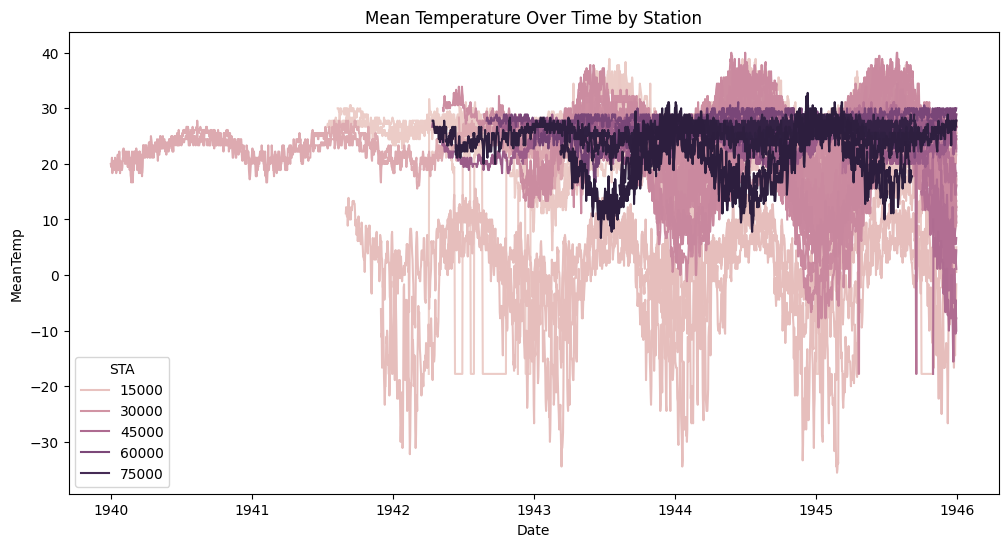

In [ ]:
# Impute surrounding values if abnormal temp
for i in abnormal_temp:
    prev_temp = df_deleted.iloc[i-1]['MeanTemp']
    next_temp = df_deleted.iloc[i+1]['MeanTemp']
    avg_temp = (prev_temp + next_temp) / 2
    df_deleted.loc[df_deleted.index[i], 'MeanTemp'] = avg_temp

# plot mean_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='MeanTemp', hue='STA')
plt.title('Mean Temperature Over Time by Station')

Text(0.5, 1.0, 'Max Temperature Over Time by Station')

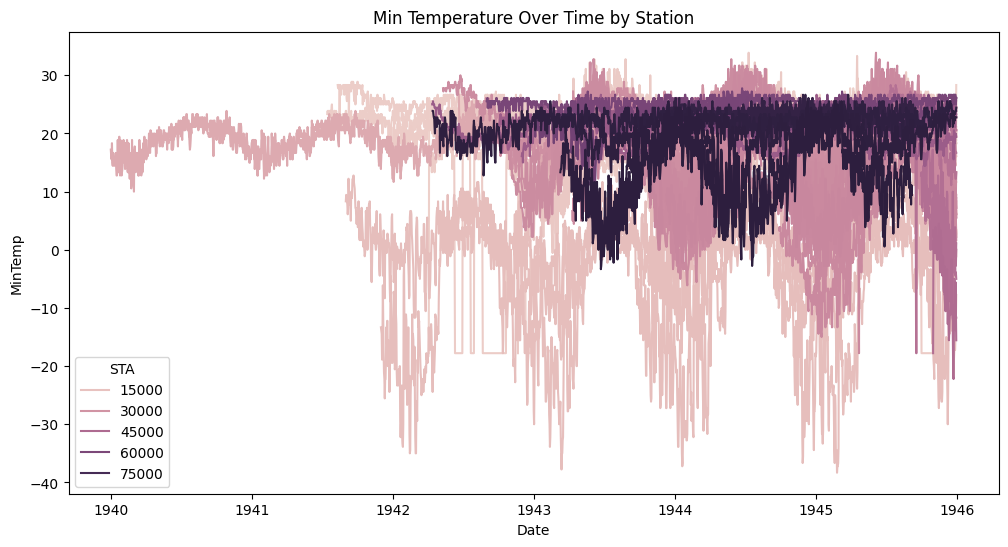

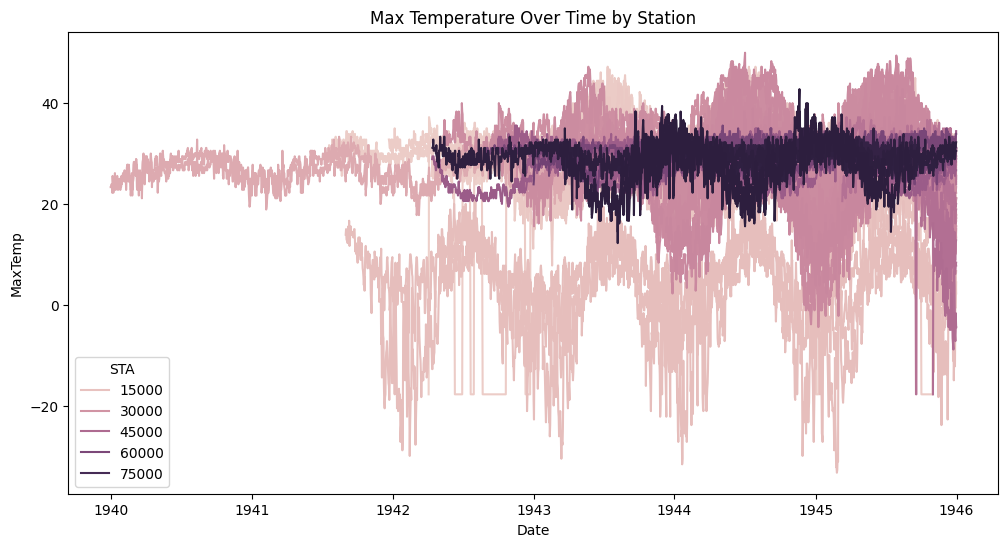

In [ ]:
# Do the same fix for Min and Max temp

temp_diff_min = df_deleted['MinTemp'].diff()

# Account for change in temp between station
station_change_rows = 0
for station in df_deleted['STA'].unique():
    station_change_rows += len(df_deleted[df_deleted['STA'] == station])
    temp_diff_min[station_change_rows] = 1000

abnormal_temp = temp_diff_min[temp_diff_min < -20].index

for i in abnormal_temp:
    prev_temp = df_deleted.iloc[i-1]['MinTemp']
    next_temp = df_deleted.iloc[i+1]['MinTemp']
    avg_temp = (prev_temp + next_temp) / 2
    df_deleted.loc[df_deleted.index[i], 'MinTemp'] = avg_temp

temp_diff_max = df_deleted['MaxTemp'].diff()


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='MinTemp', hue='STA')
plt.title('Min Temperature Over Time by Station')

# Account for change in temp between station
station_change_rows = 0
for station in df_deleted['STA'].unique():
    station_change_rows += len(df_deleted[df_deleted['STA'] == station])
    temp_diff_max[station_change_rows] = 1000

abnormal_temp = temp_diff_max[temp_diff_max < -20].index

for i in abnormal_temp:
    prev_temp = df_deleted.iloc[i-1]['MaxTemp']
    next_temp = df_deleted.iloc[i+1]['MaxTemp']
    avg_temp = (prev_temp + next_temp) / 2
    df_deleted.loc[df_deleted.index[i], 'MaxTemp'] = avg_temp


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='MaxTemp', hue='STA')
plt.title('Max Temperature Over Time by Station')

In [ ]:
# Delete abnormal stations where max_temp <= min_temp

# See when max_temp is lower than min_temp
abnormal_max_temp = df_deleted[df_deleted['MaxTemp'] <= df_deleted['MinTemp']]
print(abnormal_max_temp[['STA', 'Date', 'MaxTemp', 'MinTemp']])

# Delete these stations
delete_station = [10804, 11704, 11901, 11902, 16201, 42204, 43302]
df_deleted = df_deleted[~df_deleted['STA'].isin(delete_station)]

         STA       Date    MaxTemp    MinTemp
8461   10804 1942-04-04 -17.777778 -17.777778
19586  11704 1945-01-01   5.833333  16.666667
19587  11704 1945-01-02 -17.777778  15.555556
19588  11704 1945-01-03 -17.777778  17.777778
19589  11704 1945-01-04 -17.777778  16.111111
...      ...        ...        ...        ...
22552  11902 1942-12-23 -17.777778 -17.777778
30729  16201 1944-01-22  -6.111111  -1.666667
64677  42204 1945-09-18 -17.777778 -17.777778
64678  42204 1945-09-19 -17.777778 -17.777778
65136  43302 1945-11-01 -17.777778 -17.777778

[146 rows x 4 columns]


Text(0.5, 1.0, 'Snowfall Over Time by Station')

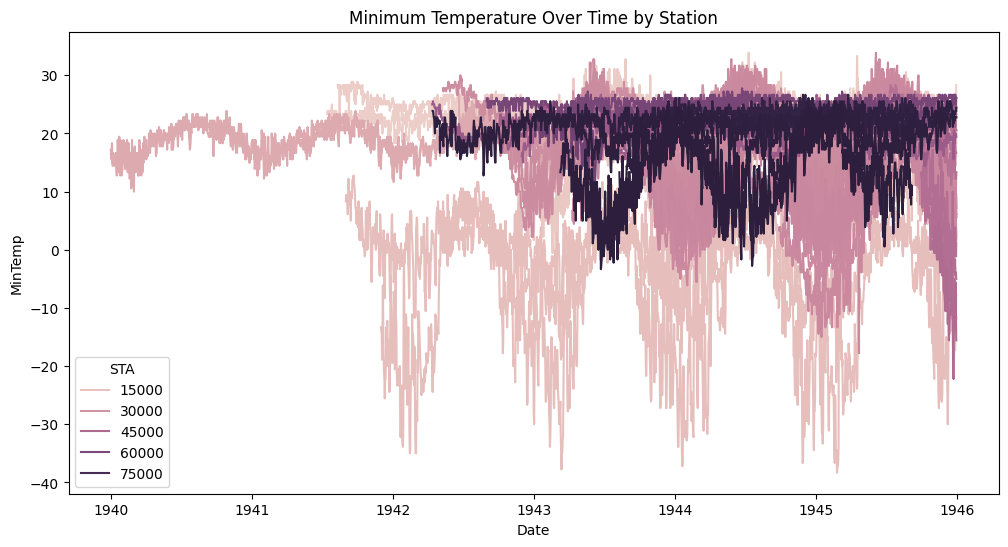

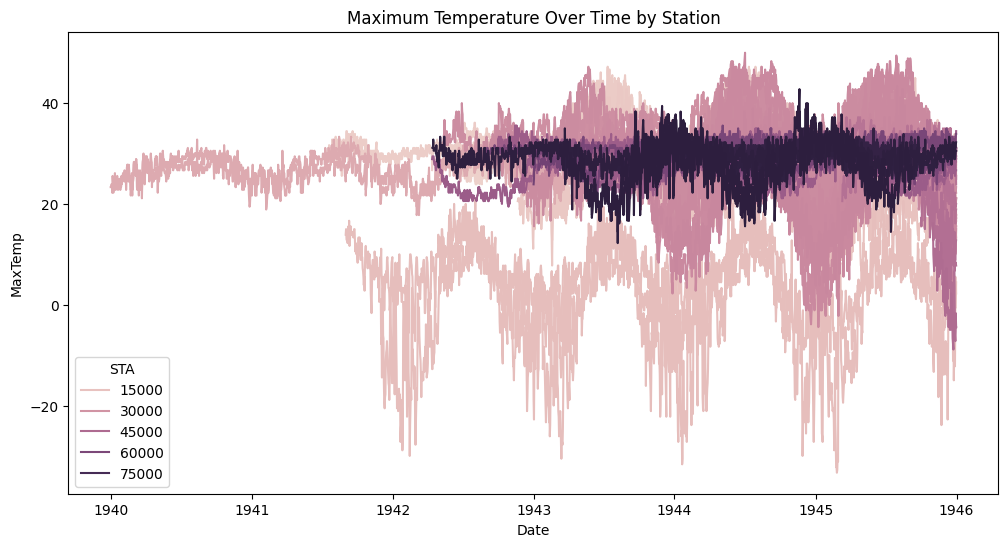

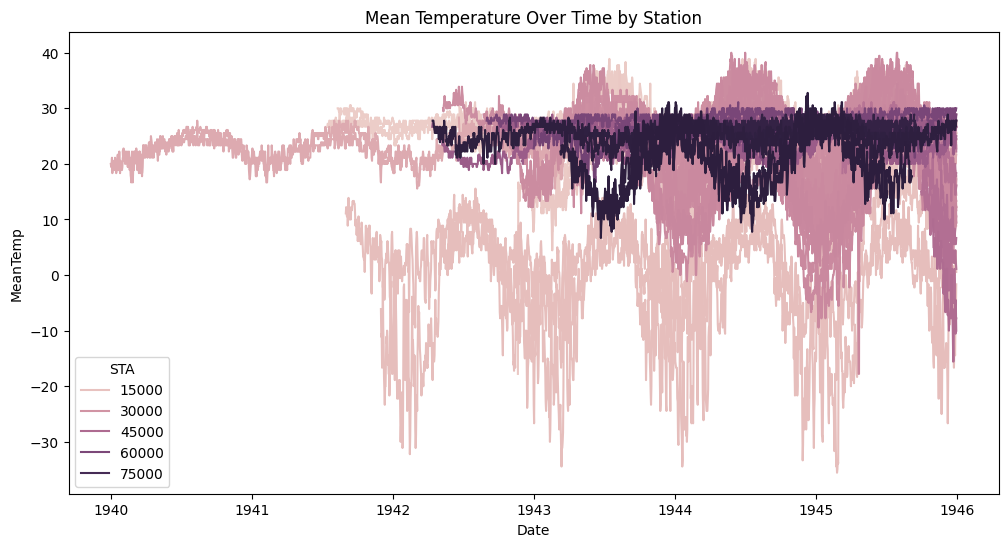

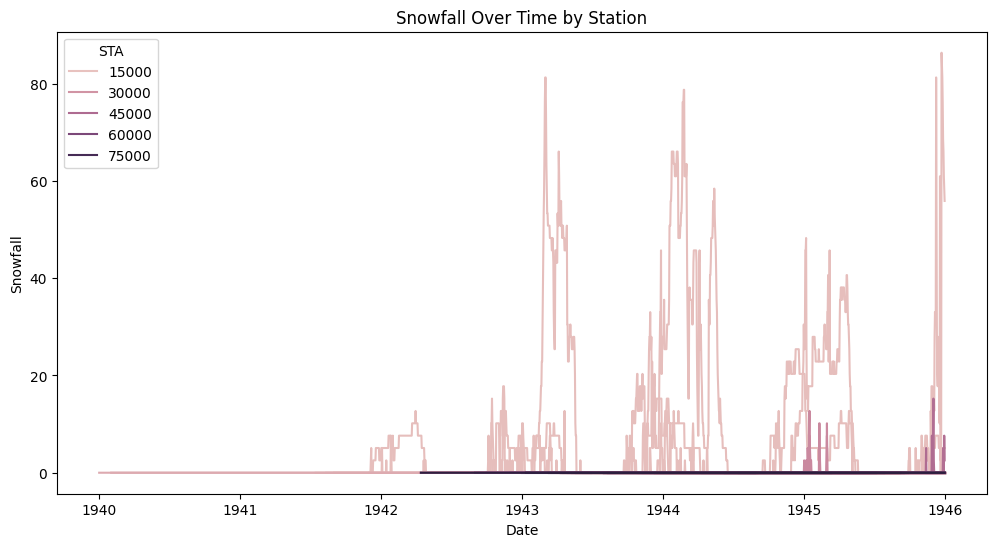

In [ ]:
# Plot the min_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='MinTemp', hue='STA')
plt.title('Minimum Temperature Over Time by Station')

# plot max_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='MaxTemp', hue='STA')
plt.title('Maximum Temperature Over Time by Station')

# plot mean_temp for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='MeanTemp', hue='STA')
plt.title('Mean Temperature Over Time by Station')

# Plot Snowfall for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_deleted, x='Date', y='Snowfall', hue='STA')
plt.title('Snowfall Over Time by Station')

## 3. Select the feature(s) for the model, and explain the reason

Selected features are: STA, Date, Precip, MaxTemp, MinTemp, MeanTemp, Snowfall.

This is because PRCP,MAX,Min,MEA,SNF are redundant with those features.
PoorWeather have weak correlation with the target MinTemp, YR, MO, DA seems to refer to year, month, day and is redudant with Date.

STA is selected, since we expect the temperature to be specific to some station.

Date is selected because we expect temperature to be seasonal, and that temperature should be a time series.

Based on these features, we use Tsfresh to automatically extract and select relevant features, rather than using naive features. To extract features, first create a rolling window. Window rolled has a size of 5 days

In [21]:
import tsfresh
# Create rolling window
from tsfresh.utilities.dataframe_functions import roll_time_series

df_rolled = roll_time_series(df_deleted, column_id='STA', column_sort='Date', min_timeshift=4, max_timeshift=4)

print(df_rolled.head())



Rolling: 100%|██████████| 40/40 [00:07<00:00,  5.56it/s]


          STA       Date  Precip    MaxTemp    MinTemp   MeanTemp  Snowfall  \
147110  10001 1942-07-01   1.016  25.555556  22.222222  23.888889       0.0   
147111  10001 1942-07-02   0.000  28.888889  21.666667  25.555556       0.0   
147112  10001 1942-07-03   2.540  26.111111  22.222222  24.444444       0.0   
147113  10001 1942-07-04   2.540  26.666667  22.222222  24.444444       0.0   
147114  10001 1942-07-05   0.000  26.666667  21.666667  24.444444       0.0   

                                  id  
147110  (10001, 1942-07-05 00:00:00)  
147111  (10001, 1942-07-05 00:00:00)  
147112  (10001, 1942-07-05 00:00:00)  
147113  (10001, 1942-07-05 00:00:00)  
147114  (10001, 1942-07-05 00:00:00)  


## 4. Split the dataset (80% for training, 20% for testing)

For train test split, doesn't make sense to split dataset randomly, else there could be data leakage where model may forecast past events based on data trained from the future. Instead, for each station, we keep the oldest 80% as train, use the newest 20% as test.

In [22]:
# Drop the label
X = df_rolled.drop(columns=['MinTemp'])

# Group by window ID
grouped = df_rolled.groupby('id')

# See the first group
for id, group in grouped:
    print(f"Group ID: {id}")
    print(group)
    break

# Use the last value of the window as the label to predict
y = grouped['MeanTemp'].last()

# For each station, keep the oldest 80% IDs as train, the newest 20% as test.

unique_ids = df_rolled['id'].drop_duplicates().reset_index(drop=True)

# Group by the station ID from the id tuple

unique_ids_grouped = unique_ids.groupby(unique_ids.apply(lambda x: x[0]))  

# Split the IDs by station
train_ids = []
test_ids = []

# Select the first 80% of IDs as train, rest as test
for sta, group in unique_ids_grouped:
    n = len(group)
    split_idx = int(n * 0.8)
    train_ids.extend(group.iloc[:split_idx])
    test_ids.extend(group.iloc[split_idx:])


# Filter rows where id is in train/test
X_train = X[X['id'].isin(train_ids)].reset_index(drop=True)
X_test = X[X['id'].isin(test_ids)].reset_index(drop=True)

y_train = y.loc[train_ids]
y_test = y.loc[test_ids]

Group ID: (10001, Timestamp('1942-07-05 00:00:00'))
          STA       Date  Precip    MaxTemp    MinTemp   MeanTemp  Snowfall  \
147110  10001 1942-07-01   1.016  25.555556  22.222222  23.888889       0.0   
147111  10001 1942-07-02   0.000  28.888889  21.666667  25.555556       0.0   
147112  10001 1942-07-03   2.540  26.111111  22.222222  24.444444       0.0   
147113  10001 1942-07-04   2.540  26.666667  22.222222  24.444444       0.0   
147114  10001 1942-07-05   0.000  26.666667  21.666667  24.444444       0.0   

                                  id  
147110  (10001, 1942-07-05 00:00:00)  
147111  (10001, 1942-07-05 00:00:00)  
147112  (10001, 1942-07-05 00:00:00)  
147113  (10001, 1942-07-05 00:00:00)  
147114  (10001, 1942-07-05 00:00:00)  


In [27]:
# Find a station with snowfall, to extract features from
for station in X['STA'].unique():
    print (f'Station: {station}')
    print (f'Snowfall: {X[X["STA"]==station]["Snowfall"].mean()}')

Station: 10001
Snowfall: 0.0
Station: 10002
Snowfall: 0.0
Station: 10101
Snowfall: 0.0
Station: 10102
Snowfall: 0.0
Station: 10505
Snowfall: 0.0
Station: 10703
Snowfall: 0.0
Station: 10704
Snowfall: 0.0
Station: 10718
Snowfall: 0.0
Station: 10802
Snowfall: 0.0
Station: 10804
Snowfall: 0.0
Station: 10807
Snowfall: 0.0
Station: 11101
Snowfall: 0.0
Station: 11103
Snowfall: 0.0
Station: 11501
Snowfall: 0.0
Station: 11601
Snowfall: 0.0
Station: 11606
Snowfall: 0.0
Station: 11610
Snowfall: 0.0
Station: 11615
Snowfall: 0.0
Station: 11701
Snowfall: 0.0
Station: 11704
Snowfall: 0.0
Station: 11801
Snowfall: 0.0
Station: 11901
Snowfall: 0.0
Station: 11902
Snowfall: 0.0
Station: 12001
Snowfall: 0.0
Station: 12101
Snowfall: 0.0
Station: 12702
Snowfall: 0.0
Station: 12706
Snowfall: 0.0
Station: 12801
Snowfall: 0.0
Station: 13002
Snowfall: 0.0
Station: 13005
Snowfall: 0.0
Station: 13013
Snowfall: 0.0
Station: 13201
Snowfall: 0.0
Station: 15027
Snowfall: 0.0
Station: 16201
Snowfall: 0.5698883248730964

Very few station has snowfall. Choosing station 44401, which has a mean snowfall of 0.2228

In [28]:
# Generate and select features for ONE station, to get relevant features

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

# Select X train using the first station
X_train_small = X_train[X_train['STA'] == 44401]
# Select y train index using the first station
y_train_small = y_train[y_train.index.to_series().apply(lambda x: x[0] == 44401)]

# Extract feature
X_extracted_small = extract_features(X_train_small, column_id="id", column_sort="Date")

# Impute missing feature
impute(X_extracted_small)

print(len(X_extracted_small))

# Select relevant feature
X_selected_small = select_features(X_extracted_small, y_train_small)

Feature Extraction: 100%|██████████| 38/38 [00:03<00:00, 12.07it/s]
d:\School\MSA\2025-Phase-2-main\data-science\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['MaxTemp__sample_entropy' 'MaxTemp__autocorrelation__lag_5'
 'MaxTemp__autocorrelation__lag_6' ...
 'Precip__permutation_entropy__dimension_7__tau_1'
 'Precip__query_similarity_count__query_None__threshold_0.0'
 'Precip__mean_n_absolute_max__number_of_maxima_7'] did not have any finite values. Filling with zeros.
  warnings.warn(


45


In [29]:
# Select the features that are deemed relevant
selected_features_parameters = tsfresh.feature_extraction.settings.from_columns(X_selected_small)
print(selected_features_parameters)


{'MeanTemp': {'cwt_coefficients': [{'coeff': 4, 'w': 2, 'widths': (2, 5, 10, 20)}, {'coeff': 4, 'w': 5, 'widths': (2, 5, 10, 20)}, {'coeff': 2, 'w': 20, 'widths': (2, 5, 10, 20)}, {'coeff': 3, 'w': 10, 'widths': (2, 5, 10, 20)}, {'coeff': 1, 'w': 20, 'widths': (2, 5, 10, 20)}, {'coeff': 4, 'w': 10, 'widths': (2, 5, 10, 20)}, {'coeff': 1, 'w': 10, 'widths': (2, 5, 10, 20)}, {'coeff': 2, 'w': 10, 'widths': (2, 5, 10, 20)}, {'coeff': 3, 'w': 20, 'widths': (2, 5, 10, 20)}, {'coeff': 3, 'w': 5, 'widths': (2, 5, 10, 20)}, {'coeff': 0, 'w': 20, 'widths': (2, 5, 10, 20)}, {'coeff': 4, 'w': 20, 'widths': (2, 5, 10, 20)}, {'coeff': 3, 'w': 2, 'widths': (2, 5, 10, 20)}, {'coeff': 0, 'w': 10, 'widths': (2, 5, 10, 20)}, {'coeff': 2, 'w': 5, 'widths': (2, 5, 10, 20)}, {'coeff': 1, 'w': 5, 'widths': (2, 5, 10, 20)}, {'coeff': 0, 'w': 5, 'widths': (2, 5, 10, 20)}, {'coeff': 2, 'w': 2, 'widths': (2, 5, 10, 20)}, {'coeff': 1, 'w': 2, 'widths': (2, 5, 10, 20)}], 'quantile': [{'q': 0.9}, {'q': 0.6}, {'q':

In [32]:
# Extract feature on the full training set

X_extracted = extract_features(X_train, column_id="id", column_sort="Date",kind_to_fc_parameters=selected_features_parameters)

impute(X_extracted)

print(len(X_extracted))

Feature Extraction: 100%|██████████| 40/40 [02:45<00:00,  4.14s/it]


59890


## 5. Choose the algorithm, train and test the model

This is a supervised regression problem, time series forecast with continuous variables and continuous target. The model I chose is the Random Forest  Regressor. This is because of the high amount of noise in the data, which will handled well due to averaging of predictions across many decision trees.

Because of the high number of features, random forest is a good choice since it considers a random subset of features for every tree rather than considering all features at once. This prevents the machine learning model from overfitting to over-correlated features, and allows it to only pick features it deems necessary.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_extracted, y_train)

X_test_extracted = extract_features(X_test, column_id="id", column_sort="Date",kind_to_fc_parameters=selected_features_parameters)
impute(X_test_extracted)



Feature Extraction: 100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


Precip__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.2  \
10001 1945-01-13                                                                0.0   
      1945-01-14                                                                0.0   
      1945-01-15                                                                0.0   
      1945-01-16                                                                0.0   
      1945-01-17                                                                0.0   
...                                                                             ...   
82503 1945-09-03                                                                0.0   
      1945-09-04                                                                0.0   
      1945-09-05                                                                0.0   
      1945-09-06                                                                0.0   
      1945-09-07                                                                0.0   

                  MaxTemp__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)  \
10001 1945-01-13                                                       28.782075   
      1945-01-14                                                       27.111019   
      1945-01-15                                                       27.083186   
      1945-01-16                                                       27.746837   
      1945-01-17                                                       28.110615   
...                                                                          ...   
82503 1945-09-03                                                       19.901449   
      1945-09-04                                                       22.084310   
      1945-09-05                                                       24.752961   
      1945-09-06                                                       23.740186   
      1945-09-07                                                       22.942223   

                  MaxTemp__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)  \
10001 1945-01-13                                                       50.146864   
      1945-01-14                                                       48.899672   
      1945-01-15                                                       48.656375   
      1945-01-16                                                       48.784446   
      1945-01-17                                                       48.240899   
...                                                                          ...   
82503 1945-09-03                                                       36.757842   
      1945-09-04                                                       37.969068   
      1945-09-05                                                       38.511653   
      1945-09-06                                                       38.937313   
      1945-09-07                                                       39.492960   

                  MaxTemp__cwt_coefficients__coeff_2__w_20__widths_(2, 5, 10, 20)  \
10001 1945-01-13                                                        31.924464   
      1945-01-14                                                        31.166092   
      1945-01-15                                                        31.122450   
      1945-01-16                                                        31.218123   
      1945-01-17                                                        30.622631   
...                                                                           ...   
82503 1945-09-03                                                        23.579334   
      1945-09-04                                                        24.395589   
      1945-09-05                                                        24.133706   
      1945-09-06                                                        24.445890   
      1945-09-07    

## 6. Evaluate and Visualize model Performance

In [34]:
# Generate metrics
y_pred = model.predict(X_test_extracted)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.6f}")
print(f"R2: {r2:.6f}")

RMSE: 0.139312
R2: 0.997337


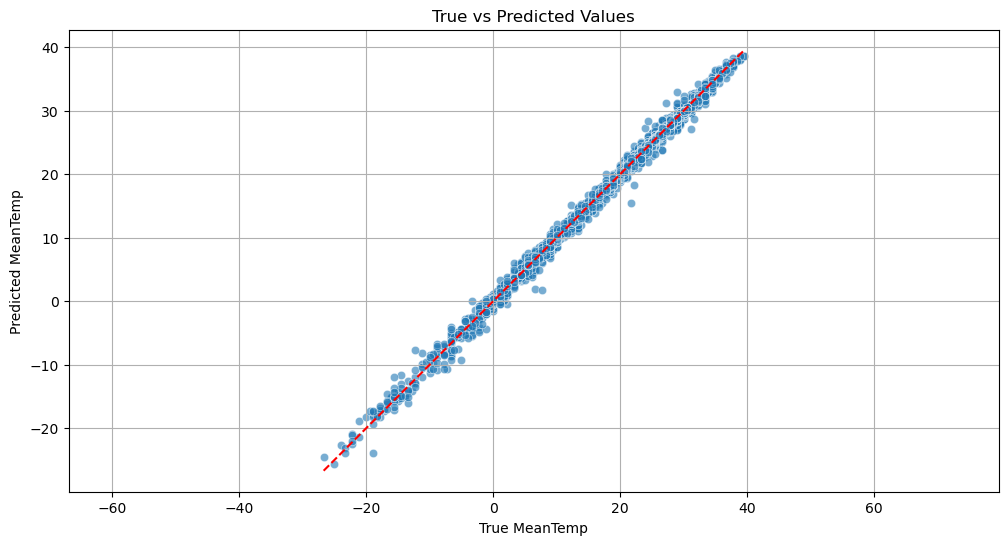

In [35]:
# Plot True vs Predicted temp
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
# Plot gradient of y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True MeanTemp")
plt.ylabel("Predicted MeanTemp")
plt.title("True vs Predicted Values")
plt.grid(True)
plt.axis('equal')
plt.show()

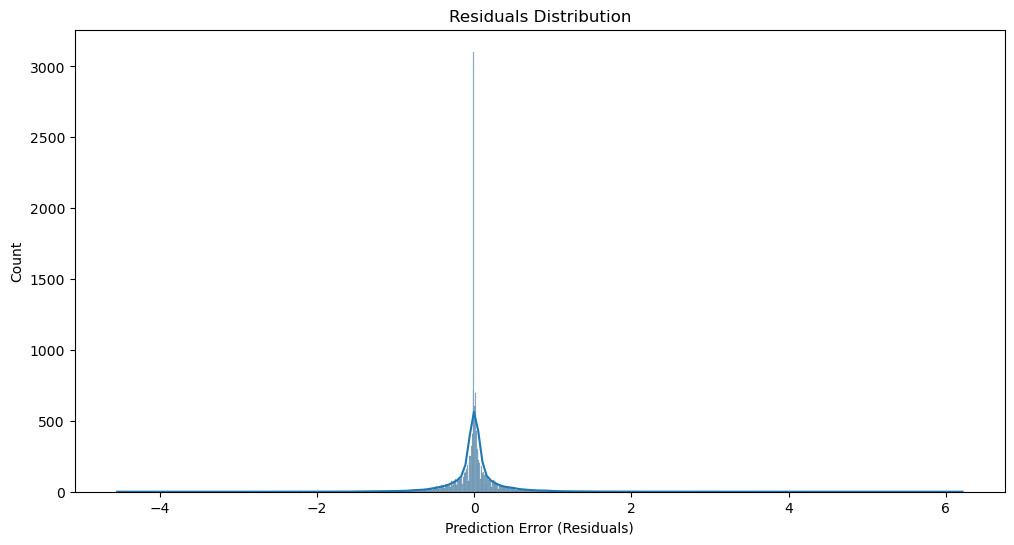

In [36]:
# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residuals)")
plt.show()

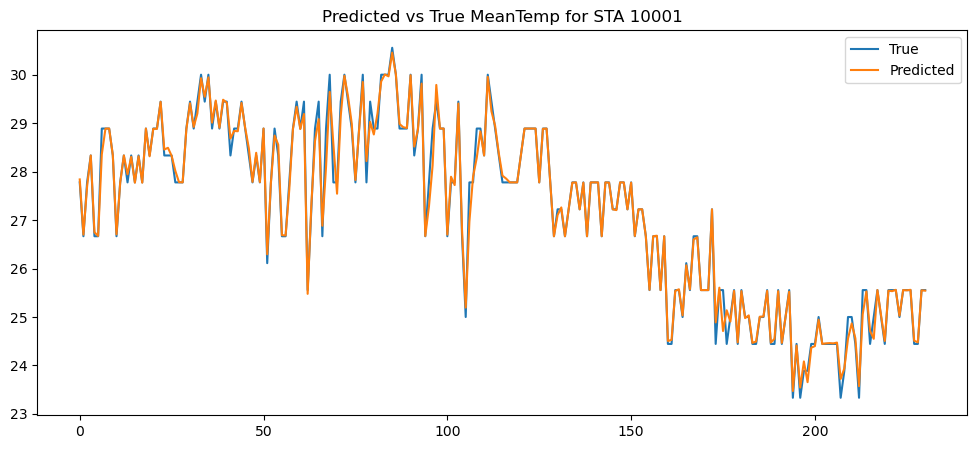

In [37]:
# Plot predicted temperature for station 10001

# Get the index of the station
station_index = y_test.index.to_series().apply(lambda x: x[0] == 10001)
y_test_station = y_test[station_index]
y_pred_station = y_pred[station_index]

plt.figure(figsize=(12, 5))
plt.plot(y_test_station.values, label='True')
plt.plot(y_pred_station, label='Predicted')
plt.title('Predicted vs True MeanTemp for STA 10001')
plt.legend()
plt.show()

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

R2 is the coefficient of determination. It is the value that measures the amount of variance that is explained by the model compared to the variance that exists when using the mean as the predictor. It is calulate using  (1 - the ratio of squared residual in the model compared to squared residual of the mean).

Since it cannot be higher than 1, it can be interpreted as the fraction of variance that is explained by the model, where our results of 0.997 represents 99.7% of variance is explained in our model, compared to predicting the temperature using the mean.



RMSE is the root mean squared error. For each residual, the square of the error is taken, summed together and the mean of this square is taken. Then, we root the mean to get a measure of error in the unit we begun with. It measures the average absolute magnitude of errors squared, which means the RMSE error would penalize large deviation harder compared to using just the absolute error.

In our case, a value of 0.139 means the temperature is typically 0.139 degrees off the true temperature.

## 8. Discuss the model performance based on the plot

Based on the plots, this model performed exceptionally well. The largest deviation from the true temperature is within +- 6 degrees.

The residual plot follows a normal distribution, and is centered around 0. This means that our model does not over or under estimate the true temperature.

Based on the plots for true vs predicted values, no significant area of weakness could be found. For extreme values of residuals, they tend to lie to the right of the true prediction line, that for the most incorrect predictions, our model tends to predict the temperature as higher than the actual temperature.